<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/7%EC%9E%A5_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#7-1 결측치 처리
import pandas as pd
import numpy as np
from seaborn import load_dataset
df = load_dataset('mpg')
print(df.head())
print(df.info())
#확인결과 horsepower에 6개의 결측치가 존재함
print(df.isna().sum())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [ ]:
#결측데이터
missing=df[df.isna().any(axis=1)]
print(missing)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


In [ ]:
#결측치 제거
df1=df.dropna(axis=0).copy()
print(df1.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [ ]:
#결측치 대치
missing_idx=missing.index
df2=df.copy()
df2['horsepower']=df2['horsepower'].fillna(0)
print(df2.isna().sum().sum())
print(df2.loc[missing_idx])

0
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         0.0    2046          19.0   
126  21.0          6         200.0         0.0    2875          17.0   
330  40.9          4          85.0         0.0    1835          17.3   
336  23.6          4         140.0         0.0    2905          14.3   
354  34.5          4         100.0         0.0    2320          15.8   
374  23.0          4         151.0         0.0    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


In [ ]:
#평균(또는 중위수)으로 대치
df3=df.copy()
df3['horsepower']=df3['horsepower'].fillna(df3['horsepower'].mean())
print(df3.loc[missing_idx])
df4=df.copy()
df4['horsepower']=df4['horsepower'].fillna(df4['horsepower'].median())
print(df4.loc[missing_idx])

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0  104.469388    2046          19.0   
126  21.0          6         200.0  104.469388    2875          17.0   
330  40.9          4          85.0  104.469388    1835          17.3   
336  23.6          4         140.0  104.469388    2905          14.3   
354  34.5          4         100.0  104.469388    2320          15.8   
374  23.0          4         151.0  104.469388    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0        93.5    2046          19.0   
126  21.0      

In [ ]:
#사이킷런 이용
from sklearn.impute import SimpleImputer
df5=df.copy()
imputer=SimpleImputer(strategy='mean')
df5[['horsepower']]=imputer.fit_transform(df5[['horsepower']])
print(df5.loc[missing_idx])
#이 방법은 여러 열에 결측치가 있는 경우 유용함

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0  104.469388    2046          19.0   
126  21.0          6         200.0  104.469388    2875          17.0   
330  40.9          4          85.0  104.469388    1835          17.3   
336  23.6          4         140.0  104.469388    2905          14.3   
354  34.5          4         100.0  104.469388    2320          15.8   
374  23.0          4         151.0  104.469388    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


In [ ]:
# 그외방법
##bfill,ffill로 이전 또는 이후 데이터로 대치
##단순확률대치로 무작위 샘플링 값으로 대치

#KNN대치
from sklearn.impute import KNNImputer
df6 = df.copy()
imputer = KNNImputer(n_neighbors=5)
df6.iloc[:, :-2] = imputer.fit_transform(df6.iloc[:, :-2])
print(df6.loc[missing_idx])

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0        62.0    2046          19.0   
126  21.0          6         200.0       107.6    2875          17.0   
330  40.9          4          85.0        64.6    1835          17.3   
336  23.6          4         140.0       112.8    2905          14.3   
354  34.5          4         100.0        76.0    2320          15.8   
374  23.0          4         151.0        88.2    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


In [ ]:
#보간법(시계열 데이터에 유용)
df7=df.copy()
df7['horsepower']=df7['horsepower'].interpolate(method='linear')
print(df7.loc[missing_idx])

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0        97.5    2046          19.0   
126  21.0          6         200.0        97.5    2875          17.0   
330  40.9          4          85.0        67.0    1835          17.3   
336  23.6          4         140.0        80.0    2905          14.3   
354  34.5          4         100.0        74.5    2320          15.8   
374  23.0          4         151.0        83.0    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


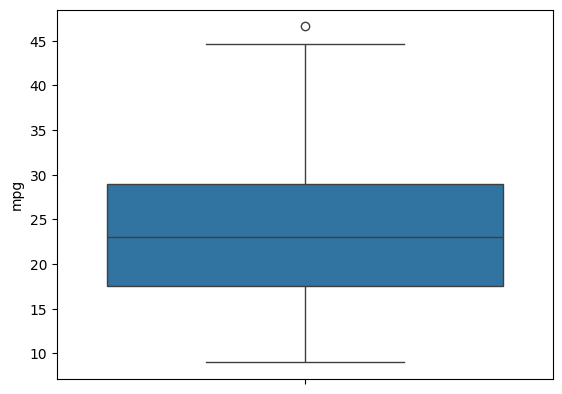

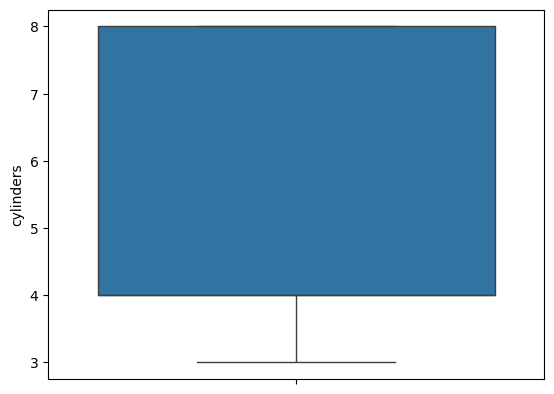

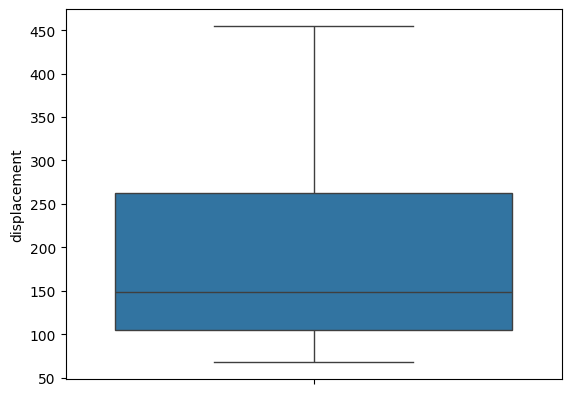

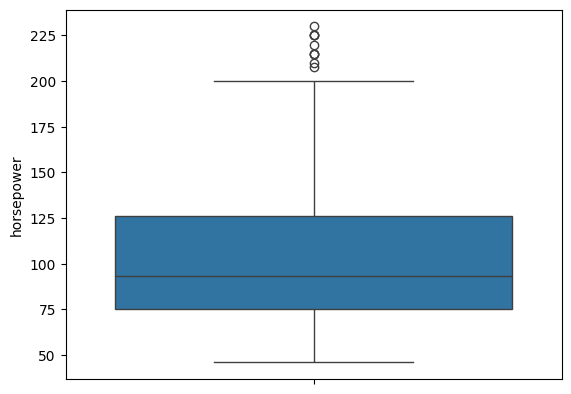

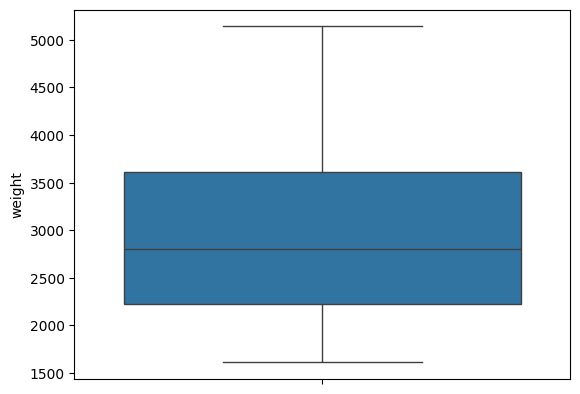

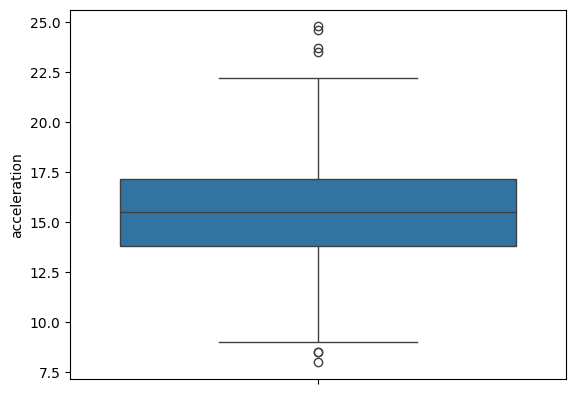

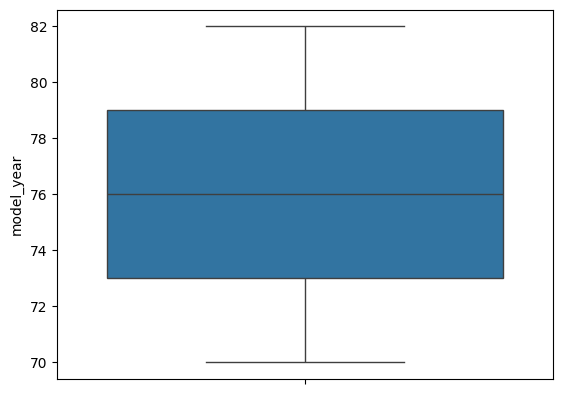

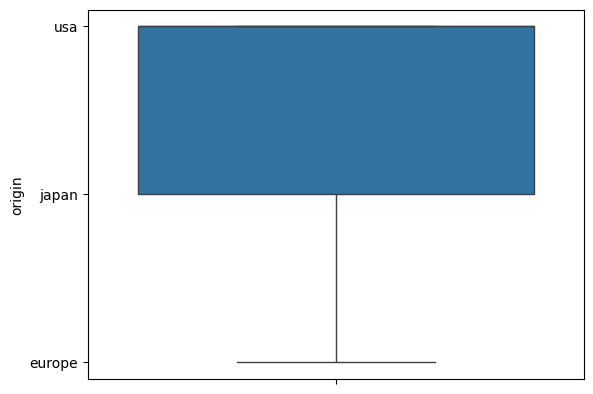

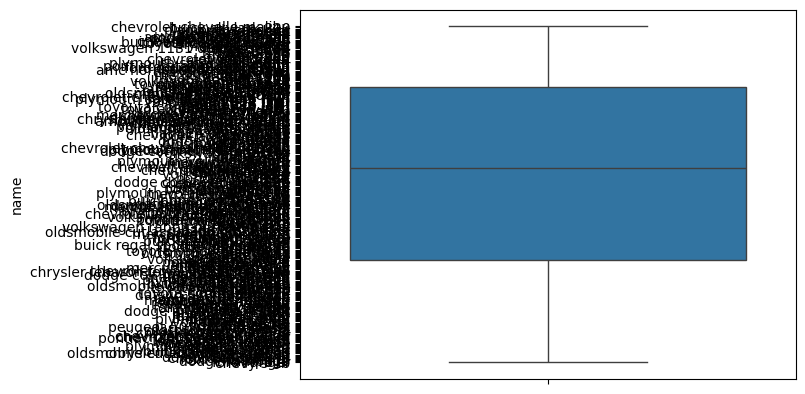

In [ ]:
#7-2 이상치 처리
import matplotlib.pyplot as plt
import seaborn as sns
df = load_dataset('mpg')
for col in df.columns:
  sns.boxplot(data=df[col])
  plt.show()
#시각화 결과 horsepower과 acceleration에 다수의 이상치가 존재

In [ ]:
#IQR
IQR=df['horsepower'].quantile(0.75)-df['horsepower'].quantile(0.25)
top=df['horsepower'].quantile(0.75)+1.5*IQR
bottom=df['horsepower'].quantile(0.25)-1.5*IQR
print(top,bottom) #이상치 기준

out_id=df[(df['horsepower']>=top)|(df['horsepower']<=bottom)].index
print(out_id)
print(f'horsepower열에 총 {len(out_id)}개의 이상치가 존재함')

202.5 -1.5
Index([6, 7, 8, 13, 25, 27, 67, 94, 95, 116], dtype='int64')
horsepower열에 총 10개의 이상치가 존재함


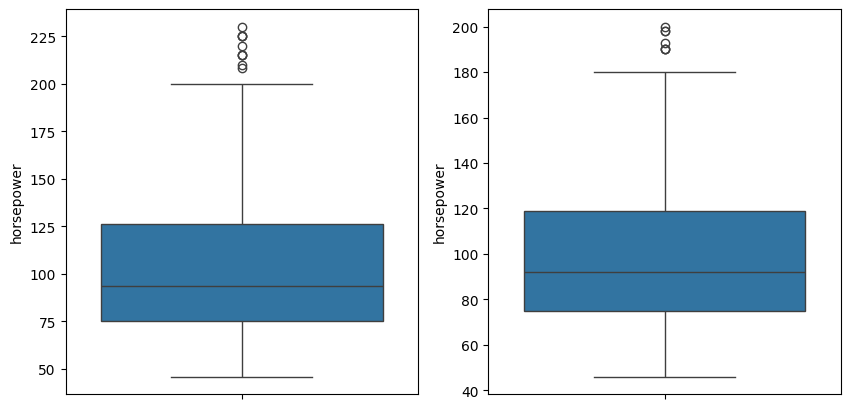

In [ ]:
#절단
trim=df[['horsepower']].drop(out_id,axis=0)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df['horsepower'],ax=ax[0])
sns.boxplot(data=trim['horsepower'],ax=ax[1])
plt.show()

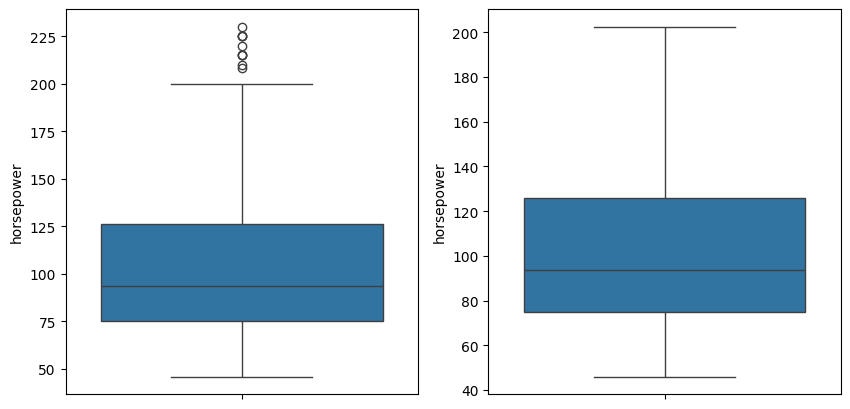

In [ ]:
#조정
wins=df[['horsepower']].clip(bottom,top).copy()

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df['horsepower'],ax=ax[0])
sns.boxplot(data=wins['horsepower'],ax=ax[1])
plt.show()

In [ ]:
#7-3 클래스 불균형 처리
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data[:,:5],columns=cancer.feature_names[:5]) #일부만 사용
df['target']=cancer.target
print(df)
print(df['target'].value_counts())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     target  
0         0  
1         0  
2         0  
3      

In [ ]:
# +불균형한 데이터로 변형
dfb=df[df['target']==1].sample(300)
dfs=df[df['target']==0].sample(30)
df_imb=pd.concat([dfb,dfs]).reset_index(drop=True)
print(df_imb['target'].value_counts())

target
1    300
0     30
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
#from sklearn.metrics import f1_score

X=df_imb.iloc[:,:-1]
y=df_imb.iloc[:,-1]
lr=LogisticRegression(max_iter=500,C=0.1)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=123)
result1=cross_validate(lr,X,y,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(result1))
#기본성능

   fit_time  score_time  test_score  train_score
0  0.016992    0.004691    0.993289     0.980392
1  0.014770    0.004799    0.980392     0.984615
2  0.018379    0.004746    0.967320     0.986784
3  0.016791    0.005190    0.986667     0.984615


In [ ]:
#랜덤 오버샘플링
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy={0:150},random_state=123)
X_ros,y_ros=ros.fit_resample(X,y)
print(pd.Series(y_ros).value_counts())

results2=cross_validate(lr,X_ros,y_ros,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(results2))

target
1    300
0    150
Name: count, dtype: int64
   fit_time  score_time  test_score  train_score
0  0.018258    0.004969    0.929936     0.938865
1  0.020057    0.004847    0.948052     0.930435
2  0.019818    0.005301    0.928105     0.937093
3  0.017344    0.005069    0.925170     0.941176


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy={0:150},random_state=123)
X_smote,y_smote=smote.fit_resample(X,y)
print(pd.Series(y_smote).value_counts())

results3=cross_validate(lr,X_smote,y_smote,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(results3))

target
1    300
0    150
Name: count, dtype: int64
   fit_time  score_time  test_score  train_score
0  0.030899    0.004798    0.935897     0.942982
1  0.038351    0.005862    0.954248     0.936543
2  0.018650    0.005681    0.934211     0.945534
3  0.018299    0.004935    0.932432     0.951965


In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(sampling_strategy={0:150},random_state=123)
X_adasyn,y_adasyn=adasyn.fit_resample(X,y)
print(pd.Series(y_adasyn).value_counts())

results4=cross_validate(lr,X_adasyn,y_adasyn,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(results4))


target
1    300
0    152
Name: count, dtype: int64
   fit_time  score_time  test_score  train_score
0  0.021173    0.005160    0.915033     0.924444
1  0.015674    0.004966    0.953020     0.911504
2  0.016099    0.004808    0.906667     0.920000
3  0.020629    0.005517    0.906667     0.924107


In [ ]:
#KMeansSMOTE
from imblearn.over_sampling import KMeansSMOTE
km=KMeansSMOTE(sampling_strategy={0:150},random_state=123)
X_km,y_km=km.fit_resample(X,y)
print(pd.Series(y_km).value_counts())

results5=cross_validate(lr,X_km,y_km,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(results5))

target
1    300
0    151
Name: count, dtype: int64
   fit_time  score_time  test_score  train_score
0  0.024177    0.005654    0.973684     0.984547
1  0.018457    0.006269    0.980392     0.982379
2  0.019217    0.005885    0.993289     0.980220
3  0.021920    0.005777    0.980392     0.984547


In [ ]:
#BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
bs=BorderlineSMOTE(sampling_strategy={0:150},random_state=123)
X_bs,y_bs=bs.fit_resample(X,y)
print(pd.Series(y_bs).value_counts())

results6=cross_validate(lr,X_bs,y_bs,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(results6))

target
1    300
0    150
Name: count, dtype: int64
   fit_time  score_time  test_score  train_score
0  0.023434    0.005453    0.954248     0.970787
1  0.017267    0.004806    0.986667     0.957303
2  0.020319    0.004966    0.965517     0.966140
3  0.023043    0.004918    0.958904     0.964126


In [ ]:
#SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
sv=SVMSMOTE(sampling_strategy={0:150},random_state=123)
X_sv,y_sv=sv.fit_resample(X,y)
print(pd.Series(y_sv).value_counts())

results7=cross_validate(lr,X_sv,y_sv,cv=skf,scoring='f1',return_train_score=True)
print(pd.DataFrame(results7))

target
1    300
0    150
Name: count, dtype: int64
   fit_time  score_time  test_score  train_score
0  0.029945    0.010812    0.967320     0.984410
1  0.030936    0.007134    0.980132     0.970917
2  0.027042    0.007004    0.965517     0.971047
3  0.033735    0.007344    0.965986     0.973214


In [ ]:
##확인결과 KMeansSMOTE방법이 점수가 높음(ADASYN의 점수가 가장 낮음)

In [ ]:
#7-4 변수변환
from sklearn.datasets import load_wine
wine=load_wine()
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['target']=wine.target

print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [ ]:
#수치형 변수변환
#표준화(평균이 0, 표준편차가 1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_std=scaler.fit_transform(df.iloc[:,:-1])
df_std=pd.DataFrame(df_std,columns=df.columns[:-1])
print(df_std.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [ ]:
#정규화(최소값 0, 최대값 1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(df.iloc[:,:-1])
df_norm=pd.DataFrame(df_norm,columns=df.columns[:-1])
print(df_norm.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415

In [ ]:
#로버스트 스케일링(IQR기준)
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_rob=scaler.fit_transform(df.iloc[:,:-1])
df_rob=pd.DataFrame(df_rob,columns=df.columns[:-1])
print(df_rob.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.897338   -0.104730  0.201439          -0.906977   1.526316   
1  0.114068   -0.057432 -0.633094          -1.930233   0.105263   
2  0.083650    0.334459  0.892086          -0.209302   0.157895   
3  1.003802    0.057432  0.402878          -0.627907   0.789474   
4  0.144487    0.489865  1.467626           0.348837   1.052632   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.420804    0.553892             -0.358209         1.050000   
1       0.278960    0.374251             -0.477612        -0.392857   
2       0.420804    0.661677             -0.238806         1.792857   
3       1.413712    0.811377             -0.597015         0.892857   
4       0.420804    0.332335              0.298507         0.378571   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.318792  0.222222                      0.924949  0.808050  
1        -0.104027  0.251852

In [ ]:
#그외
"""
로그변환 : 로그를 사용하여 큰수의 범위를 압축
거듭제곱변환 : PowerTransformer을 사용하여 로그변환(box-cox,Yeo-Johnson)
구간변환 : pandas의 cut, sklearn의 KBinsDiscretizer

범주형변환
원핫인코딩 : pandas의 get_dummies, sklearn의 OneHotEncoder
더미코딩 : sklearn의 OrdinalEncoder
레이블인코딩 : sklearn의 LabelEncoder
이진화 : sklearn의 Binarizer
"""